# **Linear Regression using Sklearn**


## **0.Hope to Skills - Free AI Course**
This note book cover the following concepts

1. Visualization
2. Sea born

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

ModuleNotFoundError: No module named 'sklearn'


https://seaborn.pydata.org/tutorial.html

### **TRAINING DATA PRE-PROCESSING**
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.   

As such, data pre-processing addresses:
- Assumptions about data shape
- Incorrect data types
- Outliers or errors
- Missing values
- Categorical variables

In [ ]:
full_data = pd.read_csv('/content/USA_Housing.csv')

**Data Shape**  
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.  

In [ ]:
# Data shape
print('train data:',full_data.shape)

In [ ]:
# View first few rows
full_data.head(5)

In [ ]:
# Data Info
full_data.info()

**Missing Data**  
 A heatmap will help better visualize what features as missing the most information.

In [ ]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
# Remove Address feature
full_data.drop('Address', axis = 1, inplace = True)

In [ ]:
# Remove rows with missing data
full_data.dropna(inplace = True)

In [ ]:
full_data

**Numeric Features**

In [ ]:
# Numeric summary
full_data.describe()

### **GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [ ]:
# Shape of train data
full_data.shape


>Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric
- everything is concatenated together

## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [ ]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Price', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = full_data['Price'] # y is the column we're trying to predict


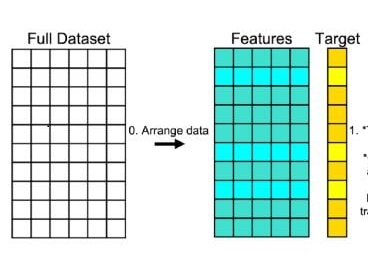

In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [ ]:
# pipe = make_pipeline(StandardScaler(), LogisticRegression())
# pipe.fit(X_train, y_train)

In [ ]:
# x Represents the Features
x_transform.shape
x_transform

In [ ]:
y # y represents the Target
y.shape

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101)

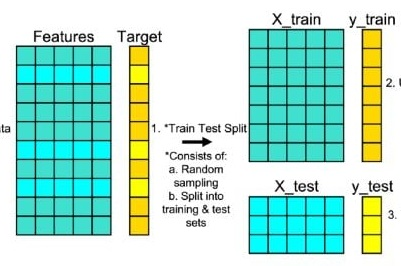

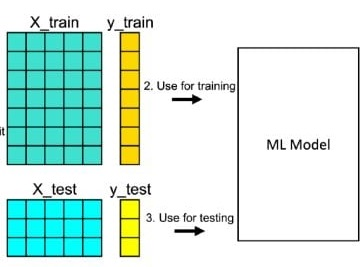

# **LINEAR REGRESSION**

## **Model Training**

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

## **Model Testing**

## **Class prediction**

In [ ]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [ ]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.

In a good model, the residuals should be randomly scattered around zero on a plot. If there are patterns or a fan-like shape, it suggests the model may not be the best fit. Outliers, points far from the others, can also affect the model.

Residual analysis helps ensure the model's accuracy and whether it meets the assumptions of linear regression. If issues are found, adjustments to the model may be needed to improve its performance.

In [ ]:
residual = actual- y_pred.reshape(-1)
print(residual)

In [ ]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

It represents that our mode is not skewed as the distribution is center aligned but note the values of the X and Y axis they in power of 6. Which means the difference between actual and predicted value was high and but it is reduced to some extent. Which is Good.

## **Model Evaluation**

# **Linear Regression**

In [ ]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

In [ ]:
# Linear Regression Model
# ------------------------------------------------------------
# Mean Squared Error: 10100187858.864885
# Root Mean Squared Error: 100499.69083964829


# 10170939558

In [ ]:
s = 10100187858 - 9839952411
print(s)

In [ ]:
y_train.shape

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

#**Random Forest**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

# **Gradient Boosting Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 9839952411.801708,
    "Descison Tree": 29698988724.82603,
    "Random Forest":14315329749.65445,
    "Gradient Boosting": 12029643835.717766
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")
